In [45]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("./modules/") # for d3plus2

import d3plus2 as d3plus

import numpy as np

In [14]:
path = './../growth-lab-diversity/data/sources/'
agglevel_titles = pd.read_csv(path+'agglevel_titles.csv')
area_titles = pd.read_csv(path+'area_titles.csv')
industry_titles = pd.read_csv(path+'industry_titles.csv')

path = './../growth-lab-diversity/data/sources/BLS/'

uc = ['area_fips', 'industry_code', 'agglvl_code', 'year', 'annual_avg_estabs', 'annual_avg_emplvl', 'total_annual_wages']
df_2015 = pd.read_csv(path+'2015_annual_singlefile.zip', usecols = uc, low_memory=False)

In [23]:
variable = 'annual_avg_estabs'
summary_var = df_2015.drop('year', axis = 1).loc[df_2015.agglvl_code == 76].groupby(['area_fips', 'industry_code'])[[variable]].sum()
summary_var.unstack().shape

(3274, 313)

In [39]:
# Check sparsity / small areas
# df_ = summary_var.groupby('area_fips').count().sort_values(by = variable)
# pd.concat([df_, industry_titles.set_index('industry_code')], axis = 1, sort = False)
# pd.concat([df_, area_titles.set_index('area_fips')], axis = 1, sort = False).dropna()


In [ ]:
summary_var.unstack().fillna(0)[variable].cov(min_periods = 10)

In [1]:
#Load modules
from numpy.random import choice 
from numpy import where, power

In [11]:
# Hard threshold and max degree backboning

G = nx.from_pandas_edgelist(edges_max_d, 'index_x', 'index_y', 'weight_'+geo)


plt.figure(figsize = (10, 8))

G = max(nx.connected_component_subgraphs(G), key=len)
nodes_s = nodes.loc[G.nodes.keys()]
pos = nx.spring_layout(G, k=.2)

nx.draw(G, pos, node_size = nodes_s.node_size.values, alpha=.6, node_color= list(nodes_s.color.values), edgelist = [])
nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3)
plt.title('max_d = '+str(max_d))
plt.title(conf_name+'\n max_degree = '+str(max_d))
#     plt.savefig('./Figures/5_max_deg/'+col_name+'_plot1.png')
#             plt.show()

plt.show()

NameError: name 'edges_max_d' is not defined

### Draw in d3plus

In [44]:
# nodes
pos_df = pd.DataFrame(pos, index = ['x', 'y']).T
nodes_wpos = pd.concat([nodes_s, pos_df], axis = 1)

In [45]:
# nodes_wpos

In [54]:
nodes_ = nodes_wpos.reset_index()[['index','x', 'y', 'node_name', 'color']].dropna(subset = ['x']).rename({'index': 'id'}, axis = 1)
nodes_['id'] = nodes_['id'].astype(str).str.zfill(4)
nodes_[['x', 'y']] = 1000 * nodes_[['x', 'y']]


In [55]:
nodes_.head()

,id,x,y,node_name,color
0,0001,-188.757136,-134.247512,Exports of '02 - Meat and edible meat offal',#FF0000
1,0002,-378.531486,-157.714233,"Exports of '03 - Fish and crustaceans, mollusc...",#FF0000
2,0003,-245.057061,-84.143683,Exports of '04 - Dairy produce; birds' eggs; n...,#FF0000
3,0004,-234.538674,-106.446370,Exports of '05 - Animal originated products; n...,#FF0000
4,0005,-150.251210,-196.251839,"Exports of '06 - Trees and other plants, live;...",#FF0000


In [56]:
import sys
sys.path.append("./../Hidalgo_Haussmann") # for HH tools
import pandas as pd
from HH_tools import robust_proximity, year_to_tp, RCA

In [6]:
nodes_['presence'] = True

edges_max_d['edge_tuple'] = list(zip(edges_max_d.index_x, edges_max_d.index_y))
edges_max_d['edge_tuple_rev'] = list(zip(edges_max_d.index_y, edges_max_d.index_x))
edges_max_d_triangles = edges_max_d.loc[edges_max_d.edge_tuple.isin(G.edges()) | edges_max_d.edge_tuple_rev.isin(G.edges())]

links = edges_max_d_triangles.reset_index().rename({'weight_CHI_COM': 'strength'},axis = 1)
links['target'] = links['index_y'].astype(str).str.zfill(4)
links['source'] = links['index_x'].astype(str).str.zfill(4)

# links = nc_backbone.reset_index().rename({'score': 'strength'},axis = 1)
# links['target'] = links['trg'].astype(str).str.zfill(4)
# links['source'] = links['src'].astype(str).str.zfill(4)

network = '{"nodes": '+nodes_.to_json(orient= 'records')+', "edges": '+links[['index', 'source', 'target']].to_json(orient= 'records')+'}\n'
# network

NameError: name 'nodes_' is not defined

In [58]:
nodes_.head()

,id,x,y,node_name,color,presence
0,0001,-188.757136,-134.247512,Exports of '02 - Meat and edible meat offal',#FF0000,True
1,0002,-378.531486,-157.714233,"Exports of '03 - Fish and crustaceans, mollusc...",#FF0000,True
2,0003,-245.057061,-84.143683,Exports of '04 - Dairy produce; birds' eggs; n...,#FF0000,True
3,0004,-234.538674,-106.446370,Exports of '05 - Animal originated products; n...,#FF0000,True
4,0005,-150.251210,-196.251839,"Exports of '06 - Trees and other plants, live;...",#FF0000,True


In [59]:
links[['index', 'source', 'target']].head()

,index,source,target
0,1,0001,0186
1,3,0001,0016
2,4,0001,0458
3,5,0001,1517
4,6,0001,1661


In [60]:
edges_max_d_triangles.to_csv('edges_max_d_triangles.csv', index = False)

In [5]:
ps = d3plus.ProductSpace(
id="name",
name="node_name",
color="color",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

NameError: name 'network' is not defined

### Color by Population Density

In [26]:
processed_data_path = './../../../../../media/miglesia/Elements/corr_st_data/'

main_tables = pd.concat([pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2011_2012.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2011_2013.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2012_2013.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2011.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2012.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2013.csv')])

main_table = main_tables.groupby('CHI ID COM').mean()/2.

# change node names into node index
# main_table.rename(columns = dict(zip(nodes.node_name, nodes.index)), inplace = True)

population = pd.read_csv('./data/pop_dist_comuna.csv').rename(columns = {'comuna_id': 'CHI ID COM'})

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [27]:
from numpy import log10
population['log_dens'] = log10(population['densidad'])
b = 8; population['log_dens_cat'] = pd.cut(population['log_dens'], b)

bins = pd.cut(population['log_dens'], b, retbins=True)[1]
bins_mean = (bins[1:] + bins[:-1])/2.

merged = pd.concat([population.set_index('CHI ID COM')[['log_dens_cat']].sort_index(), main_table], axis = 1)
popdens_RCA = RCA(merged.groupby('log_dens_cat').sum())

popdens_RCA_normed = popdens_RCA/popdens_RCA.sum()

In [28]:
pop_dens_index = pd.DataFrame((popdens_RCA_normed.T*bins_mean).T.sum(), columns = ['pop_dens_index'])
pop_dens_index = pop_dens_index.reset_index().rename(columns={'index':'node_name'})
nodes_ = nodes_.merge(pop_dens_index, on = 'node_name', how = 'left')
nodes_['pop_dens_color_code'] = pd.cut(nodes_['pop_dens_index'], bins = 7, labels=False)

from numpy import nan
rainbow_colors = {0:'#9400D3', #Violet
1:'#4B0082', #Indigo
2:'#0000FF', #Blue
3:'#00FF00', #Green
nan:'#D3D3D3',  #'#D3D3D3', #Gray
4:'#FFFF00', #Yellow
5:'#FF7F00', #Orange
6:'#FF0000'} #Red

nodes_['color_2'] = pd.DataFrame(nodes_['pop_dens_color_code'].map(rainbow_colors))

network = '{"nodes": '+nodes_.to_json(orient= 'records')+', "edges": '+links[['index', 'source', 'target']].to_json(orient= 'records')+'}\n'

In [29]:
ps = d3plus.ProductSpace(
id="name",
name="node_name",
color="color_2",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

<IPython.core.display.Javascript object>

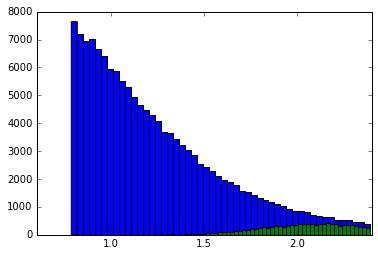

In [30]:
plt.hist(edges.weight_CHI_COM.values, 50)
plt.hist(edges_max_d.weight_CHI_COM.values, 50)
plt.show()